In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
data = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 
data = data[['fecha','origen','destino','periodo','distancia','viajes']]

In [3]:
# data['distancia'].value_counts()
# data['periodo'].value_counts()
# prueba = data.query('viajes < 1.5')
# prueba.head(60)

# normalizamos periodo y viajes

In [4]:
df_dist1 = data.loc[data['distancia'] == '002-005'] 
df_dist2 = data.loc[data['distancia'] == '005-010'] 
df_dist1 = df_dist1[['periodo','viajes']]
df_dist2 = df_dist2[['periodo','viajes']]

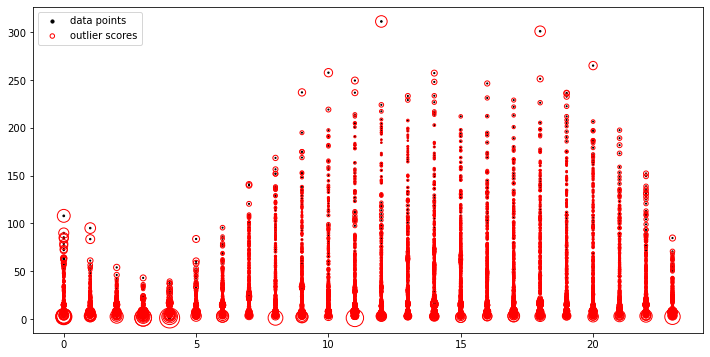

In [5]:
# Calculo normalizado
clf = LocalOutlierFactor(n_neighbors=30)
normalized_df = (df_dist1-df_dist1.mean())/df_dist1.std() # Normalizamos las 2 variables

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_
df_dist1['LOF'] = results.tolist()  #Agregamos columna lof

df_dist1.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_dist1.periodo,df_dist1['viajes'], c='black', s=df_dist1.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_dist1.periodo,df_dist1['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

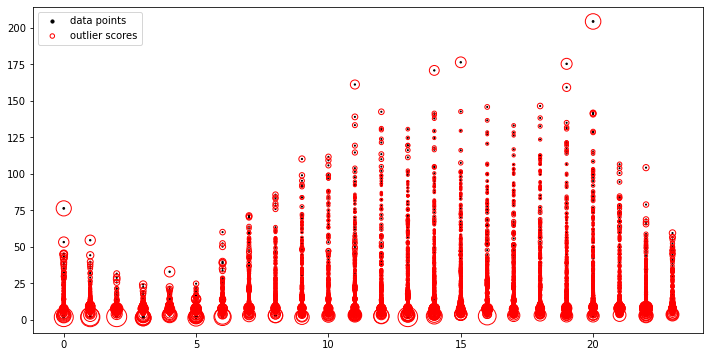

In [6]:
# Calculo normalizado
clf = LocalOutlierFactor(n_neighbors=30)
normalized_df = (df_dist2-df_dist2.mean())/df_dist2.std() # Normalizamos las 2 variables

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_
df_dist2['LOF'] = results.tolist()  #Agregamos columna lof

df_dist2.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_dist2.periodo,df_dist2['viajes'], c='black', s=df_dist2.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_dist2.periodo,df_dist2['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

# Indice periodo y normalizamos viajes

In [7]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
data = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 
data = data[['fecha','origen','destino','periodo','distancia','viajes']]

In [8]:
df_dist1 = data.loc[data['distancia'] == '002-005'] 
df_dist2 = data.loc[data['distancia'] == '005-010'] 
df_dist1 = df_dist1[['periodo','viajes']]
df_dist2 = df_dist2[['periodo','viajes']]

df_dist1 = df_dist1.set_index('periodo')
df_dist2 = df_dist2.set_index('periodo')

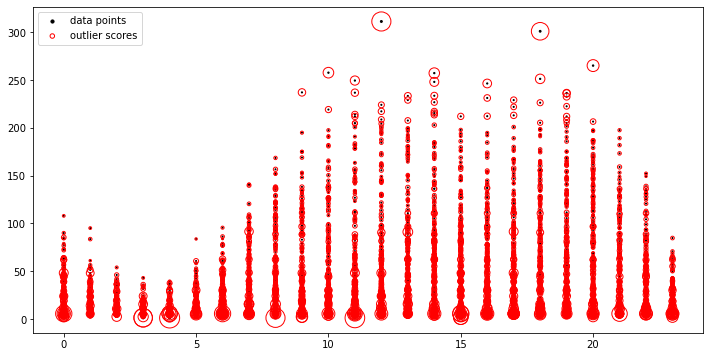

In [9]:
# Calculo normalizado
clf = LocalOutlierFactor(n_neighbors=30)
normalized_df = (df_dist1-df_dist1.mean())/df_dist1.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_
df_dist1['LOF'] = results.tolist()  #Agregamos columna lof

df_dist1.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_dist1.index,df_dist1['viajes'], c='black', s=df_dist1.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_dist1.index,df_dist1['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

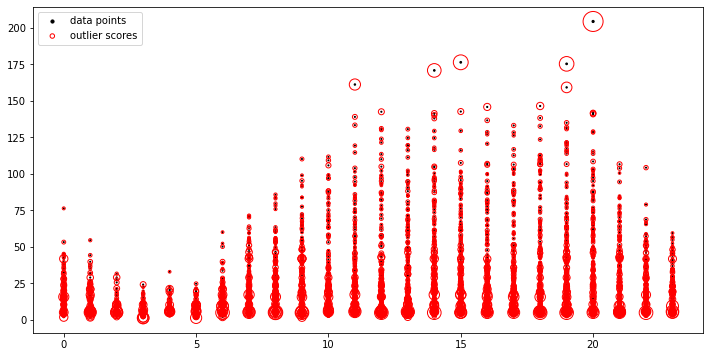

In [10]:
# Calculo normalizado
clf = LocalOutlierFactor(n_neighbors=30)
normalized_df = (df_dist2-df_dist2.mean())/df_dist2.std() # Se hace resta del valor y la media de la columna para después dividir por la desviación estandar

clf.fit_predict(normalized_df)    #Calculamos la distancia entre los puntos 
results = clf.negative_outlier_factor_
df_dist2['LOF'] = results.tolist()  #Agregamos columna lof

df_dist2.query('LOF < -1.5') # No hace nada porque no lo guardamos en una variable


plt.figure(figsize=(12, 6))
plt.scatter(df_dist2.index,df_dist2['viajes'], c='black', s=df_dist2.LOF * -1, label='data points')
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(df_dist2.index,df_dist2['viajes'], s=400 * radius, edgecolors ='r', facecolors='none', label='outlier scores')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()